In [1]:
%cd ..

/home/ltorres/leo/tesis/cloud-classification/code


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from torchvision.io import read_image
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from random import sample
import torch
import torch.nn as nn

In [4]:
from src.dataset import GCD
from src import config
from src import engine
from src import utils

from src.models.conv_nets import ResNet50

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
device = 'cuda:3'

#### Data loaders

In [7]:
path_train_images = utils.get_gcd_paths(config.DATA_DIR,'train')

In [8]:
train_dataset = GCD(path_train_images, resize=256)

train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=32,
        num_workers=4,
        shuffle=True,
    )

In [9]:
batch = next(iter(train_loader))

In [10]:
path_test_images = utils.get_gcd_paths(config.DATA_DIR,'test')

test_dataset = GCD(path_test_images, resize=256)

test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=32,
        num_workers=4,
        shuffle=True,
    )

### Data augmentation data loaders

In [11]:
augmentation_datasets = [
    GCD(utils.random_sample(path_train_images), resize=256, aug_types= atype)
    for atype in config.AUGMENTATION_TYPES
    ]

In [12]:
augmentation_loaders = [
    torch.utils.data.DataLoader(
            aug_dataset,
            batch_size=32,
            num_workers=4,
            shuffle=True,
        )
for aug_dataset in augmentation_datasets
]

#### Model

In [13]:
from torchvision import models

In [14]:
torch.cuda.empty_cache()

In [15]:
model = ResNet50(7).to(device)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [17]:
save_filename='/new_inference/1_resnet.pt'

In [18]:
best_accuracy=0
best_iteration=0
best_params={}


for e in range(config.EPOCHS):
    ### TRAIN DATASET
    preds, targets, loss = engine.train_fn(model, train_loader, criterion, optimizer, device=device)
    train_acc = accuracy_score(targets, preds)
    
    
    
    test_preds, test_targets, test_loss = engine.eval_fn(model, test_loader, criterion, device=device)
    test_acc = accuracy_score(test_targets, test_preds)
    
    if test_acc > best_accuracy:
        torch.save(model.state_dict(), config.SAVE_PATH+save_filename)
        print(f"Saved best parameters at epoch {e+1}")
        best_accuracy = test_acc
        best_iteration = e+1
        best_params = model.state_dict()
    
    print("EPOCH {}: Train acc: {:.2%} Train Loss: {:.4f} Test acc: {:.2%} Test Loss: {:.4f}".format(
        e+1,
        train_acc,
        loss,
        test_acc,
        test_loss
    ))


100%|██████████| 282/282 [00:16<00:00, 17.17it/s]


Saved best parameters at epoch 1
EPOCH 1: Train acc: 80.38% Train Loss: 0.5371 Test acc: 70.41% Test Loss: 1.0239


100%|██████████| 282/282 [00:16<00:00, 17.14it/s]


Saved best parameters at epoch 2
EPOCH 2: Train acc: 86.69% Train Loss: 0.3656 Test acc: 75.63% Test Loss: 0.7872


100%|██████████| 282/282 [00:16<00:00, 17.24it/s]


EPOCH 3: Train acc: 88.64% Train Loss: 0.3061 Test acc: 72.51% Test Loss: 0.9650


100%|██████████| 282/282 [00:16<00:00, 17.12it/s]


EPOCH 4: Train acc: 89.82% Train Loss: 0.2655 Test acc: 72.98% Test Loss: 1.0045


100%|██████████| 282/282 [00:16<00:00, 17.08it/s]


EPOCH 5: Train acc: 90.67% Train Loss: 0.2399 Test acc: 71.22% Test Loss: 1.2164


100%|██████████| 282/282 [00:16<00:00, 17.10it/s]


EPOCH 6: Train acc: 91.45% Train Loss: 0.2236 Test acc: 70.39% Test Loss: 1.1635


100%|██████████| 282/282 [00:16<00:00, 17.12it/s]


EPOCH 7: Train acc: 92.00% Train Loss: 0.2144 Test acc: 74.66% Test Loss: 1.0528


100%|██████████| 282/282 [00:16<00:00, 17.06it/s]


EPOCH 8: Train acc: 92.76% Train Loss: 0.1862 Test acc: 74.98% Test Loss: 0.8843


100%|██████████| 282/282 [00:16<00:00, 17.22it/s]


EPOCH 9: Train acc: 93.41% Train Loss: 0.1650 Test acc: 71.37% Test Loss: 1.3729


100%|██████████| 282/282 [00:16<00:00, 17.04it/s]


EPOCH 10: Train acc: 94.59% Train Loss: 0.1441 Test acc: 74.17% Test Loss: 1.1263


100%|██████████| 282/282 [00:16<00:00, 17.33it/s]


EPOCH 11: Train acc: 95.89% Train Loss: 0.1191 Test acc: 70.54% Test Loss: 1.2881


100%|██████████| 282/282 [00:16<00:00, 17.03it/s]


EPOCH 12: Train acc: 95.64% Train Loss: 0.1184 Test acc: 72.98% Test Loss: 1.5074


100%|██████████| 282/282 [00:16<00:00, 17.12it/s]


EPOCH 13: Train acc: 97.01% Train Loss: 0.0849 Test acc: 70.87% Test Loss: 1.5407


100%|██████████| 282/282 [00:16<00:00, 17.05it/s]


EPOCH 14: Train acc: 96.30% Train Loss: 0.1058 Test acc: 71.93% Test Loss: 1.3235


100%|██████████| 282/282 [00:16<00:00, 17.16it/s]


EPOCH 15: Train acc: 97.13% Train Loss: 0.0770 Test acc: 73.39% Test Loss: 1.5061


100%|██████████| 282/282 [00:16<00:00, 17.06it/s]


EPOCH 16: Train acc: 97.82% Train Loss: 0.0663 Test acc: 71.51% Test Loss: 1.4585


100%|██████████| 282/282 [00:16<00:00, 17.13it/s]


EPOCH 17: Train acc: 97.45% Train Loss: 0.0684 Test acc: 73.82% Test Loss: 1.3706


100%|██████████| 282/282 [00:16<00:00, 17.12it/s]


EPOCH 18: Train acc: 97.46% Train Loss: 0.0705 Test acc: 71.91% Test Loss: 1.7622


100%|██████████| 282/282 [00:16<00:00, 17.03it/s]


EPOCH 19: Train acc: 98.62% Train Loss: 0.0434 Test acc: 73.08% Test Loss: 1.6492


100%|██████████| 282/282 [00:16<00:00, 17.11it/s]


EPOCH 20: Train acc: 98.43% Train Loss: 0.0437 Test acc: 74.32% Test Loss: 1.4186


100%|██████████| 282/282 [00:16<00:00, 17.29it/s]


EPOCH 21: Train acc: 98.48% Train Loss: 0.0428 Test acc: 71.90% Test Loss: 1.7290


100%|██████████| 282/282 [00:16<00:00, 17.02it/s]


EPOCH 22: Train acc: 97.58% Train Loss: 0.0784 Test acc: 72.70% Test Loss: 1.5341


100%|██████████| 282/282 [00:16<00:00, 17.10it/s]


Saved best parameters at epoch 23
EPOCH 23: Train acc: 98.69% Train Loss: 0.0353 Test acc: 76.74% Test Loss: 1.2879


100%|██████████| 282/282 [00:16<00:00, 17.23it/s]


EPOCH 24: Train acc: 98.80% Train Loss: 0.0352 Test acc: 73.10% Test Loss: 1.6207


100%|██████████| 282/282 [00:16<00:00, 17.19it/s]


EPOCH 25: Train acc: 98.48% Train Loss: 0.0430 Test acc: 73.76% Test Loss: 1.3527


100%|██████████| 282/282 [00:16<00:00, 17.19it/s]


EPOCH 26: Train acc: 98.55% Train Loss: 0.0413 Test acc: 72.57% Test Loss: 1.9124


100%|██████████| 282/282 [00:16<00:00, 17.11it/s]


EPOCH 27: Train acc: 98.87% Train Loss: 0.0361 Test acc: 72.47% Test Loss: 1.3970


100%|██████████| 282/282 [00:16<00:00, 17.15it/s]


EPOCH 28: Train acc: 98.80% Train Loss: 0.0330 Test acc: 72.21% Test Loss: 1.7922


100%|██████████| 282/282 [00:16<00:00, 17.17it/s]


EPOCH 29: Train acc: 98.70% Train Loss: 0.0394 Test acc: 71.78% Test Loss: 1.7147


100%|██████████| 282/282 [00:16<00:00, 17.36it/s]

EPOCH 30: Train acc: 99.00% Train Loss: 0.0286 Test acc: 71.73% Test Loss: 1.8025


In [19]:
model.load_state_dict(torch.load(config.SAVE_PATH+save_filename))

<All keys matched successfully>

In [20]:
#torch.save(model.state_dict(), config.SAVE_PATH+'/gcd_resnet/model_params_25_03_22.pt')

In [21]:
test_preds, test_targets, test_loss = engine.eval_fn(model, test_loader, criterion, device=device)

100%|██████████| 282/282 [00:16<00:00, 17.10it/s]


In [22]:
accuracy_score(test_targets, test_preds)

0.7674444444444445

In [23]:
#torch.save(model.state_dict(), config.SAVE_PATH+'/gcd_resnet/model_params_25_03_22.pt')

---

### Accuracy per class and confusion matrix

In [24]:
class_mapper = {
    0: '1_cumulus',
    1: '2_altocumulus',
    2: '3_cirrus',
    3: '4_clearsky',
    4: '5_stratocumulus',
    5: '6_cumulonimbus',
    6: '7_mixed',
}

In [25]:
class_acc = dict()
matrix = np.zeros((7,7), dtype=int)

for i in range(7):
    pred_index = np.where(test_targets==i)[0]
    class_acc[class_mapper[i]] = accuracy_score(test_targets[pred_index], test_preds[pred_index])
    
    for j in test_preds[pred_index]:
        matrix[i,j]+=1 

In [26]:
class_acc

{'1_cumulus': 0.7013333333333334,
 '2_altocumulus': 0.644,
 '3_cirrus': 0.852589641434263,
 '4_clearsky': 0.9760855884203902,
 '5_stratocumulus': 0.6843575418994413,
 '6_cumulonimbus': 0.7935530604853314,
 '7_mixed': 0.47611202635914335}

<AxesSubplot:title={'center':'Confusion Matrix (Accuracy %)'}>

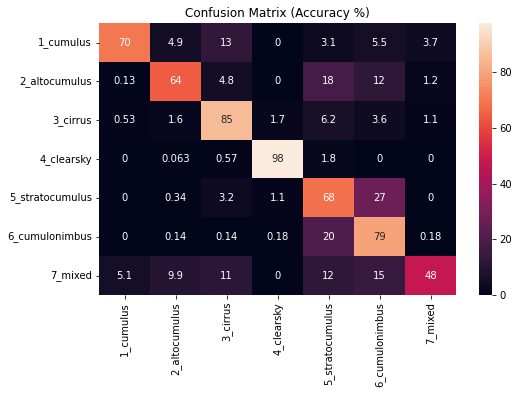

In [27]:
sum_of_rows = matrix.sum(axis=1)
conf_mat = 100*matrix / sum_of_rows[:, np.newaxis]

df_cm = pd.DataFrame(conf_mat, index = class_acc.keys(),
                  columns = class_acc.keys())

plt.figure(figsize = (8,5))
plt.title("Confusion Matrix (Accuracy %)")
sns.heatmap(df_cm, annot=True)